            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

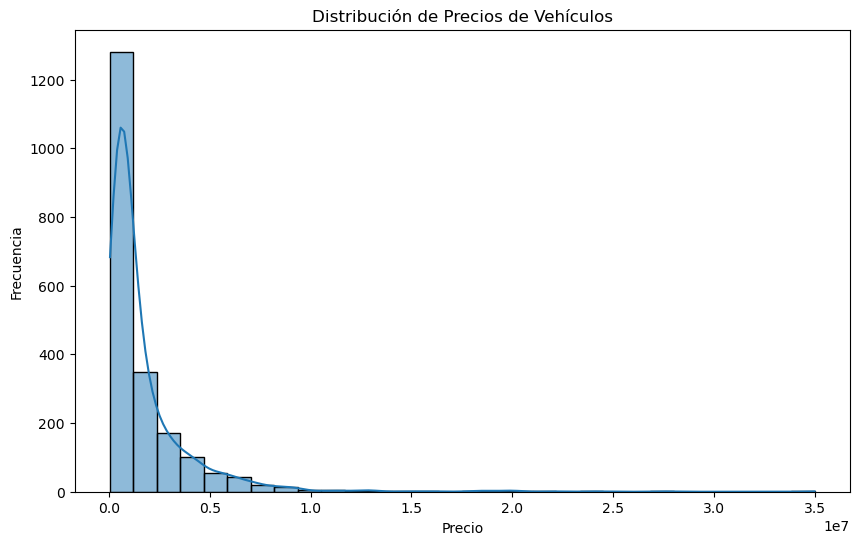

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv(r'C:\Users\neide\Desktop\HDD\UNIVERSIDAD\6 SEMESTRE\1- ANALISIS DE DATOS\3-ALGORITMOS DE APRENDIZAJE SUPERVISADO\Anexo 2 - Dataset Vehicle\car details v4.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Información general del dataset
print(df.info())

# Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribución de Precios de Vehículos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


In [2]:
import re

# Limpiar valores faltantes en las columnas numéricas con la media
numerical_cols = ['Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Eliminar filas con valores nulos en columnas categóricas críticas
df.dropna(subset=['Engine', 'Max Power', 'Max Torque', 'Drivetrain'], inplace=True)

# Extraer valores numéricos de las columnas de especificaciones técnicas
df['Engine'] = df['Engine'].apply(lambda x: int(re.search(r'\d+', x).group()) if pd.notnull(x) else 0)
df['Max Power'] = df['Max Power'].apply(lambda x: float(re.search(r'\d+\.?\d*', x).group()) if pd.notnull(x) else 0)
df['Max Torque'] = df['Max Torque'].apply(lambda x: float(re.search(r'\d+\.?\d*', x).group()) if pd.notnull(x) else 0)

# Convertir variables categóricas en variables dummy (One Hot Encoding)
df = pd.get_dummies(df, columns=['Fuel Type', 'Transmission', 'Location', 'Seller Type', 'Drivetrain'], drop_first=True)
print(df.head())


            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

    Color   Owner  Engine  Max Power  Max Torque  ...  Location_Vadodara  \
0    Grey   First    1198       87.0    109.0000  ...              False   
1   White  Second    1248       74.0    190.0000  ...              False   
2  Maroon   First    1197       79.0    112.7619  ...              False   
3     Red   First    1197       82.0    113.0000  ...              False   
4    Grey   First    2393      148.0    343.0000  ...              False   

   Location_Valsad  Location_Varanasi  Location_Warangal  \
0       

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

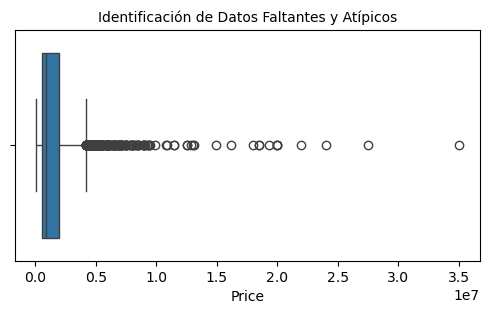

In [15]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

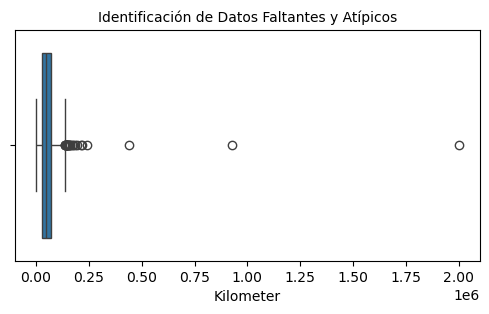

In [16]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Kilometer'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

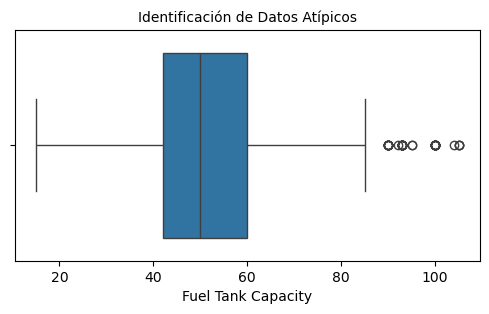

In [17]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Fuel Tank Capacity'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [3]:
from sklearn.model_selection import train_test_split

# Definir características (X) y variable objetivo (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1532, 99)
X_test shape: (384, 99)
y_train shape: (1532,)
y_test shape: (384,)


In [9]:
print(df.columns)


Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Color', 'Owner',
       'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Fuel Type_CNG + CNG',
       'Fuel Type_Diesel', 'Fuel Type_Hybrid', 'Fuel Type_LPG',
       'Fuel Type_Petrol', 'Fuel Type_Petrol + CNG', 'Transmission_Manual',
       'Location_Ahmedabad', 'Location_Allahabad', 'Location_Ambala Cantt',
       'Location_Amritsar', 'Location_Aurangabad', 'Location_Bangalore',
       'Location_Bhopal', 'Location_Bhubaneswar', 'Location_Bulandshahar',
       'Location_Chandigarh', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Dak. Kannada', 'Location_Dehradun', 'Location_Delhi',
       'Location_Deoghar', 'Location_Dharwad', 'Location_Ernakulam',
       'Location_Faizabad', 'Location_Faridabad', 'Location_Ghaziabad',
       'Location_Goa', 'Location_Gorakhpur', 'Location_Gurgaon',
       'Location_Guwahati', 'Location_Haldwani', 'Location_Hyderabad'

In [10]:
# Definir características (X) y variable objetivo (y) usando las columnas disponibles
X = df.drop(['Price', 'Make', 'Model', 'Color', 'Owner'], axis=1)
y = df['Price']

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular R^2 y Error Cuadrático Medio (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2: {r2}")
print(f"MSE: {mse}")


R^2: 0.6870969719599125
MSE: 1198416195598.8704


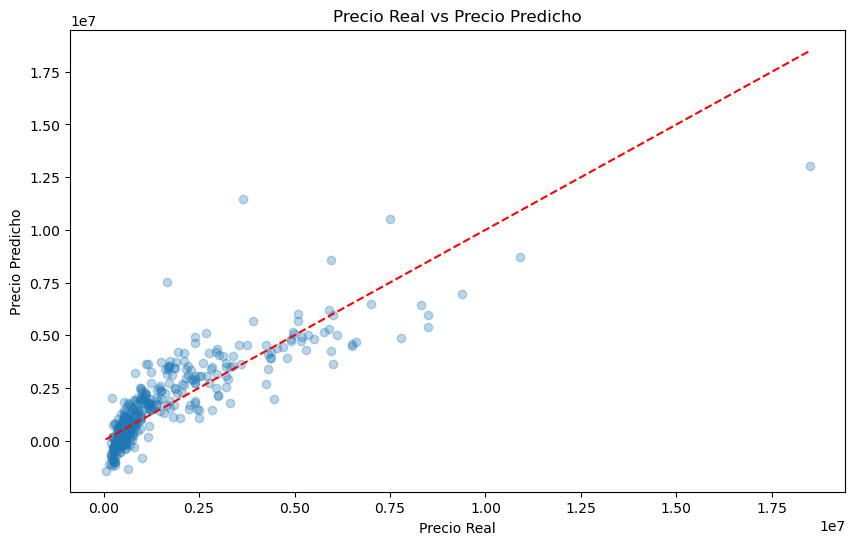

In [13]:
import matplotlib.pyplot as plt

# Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal (perfecta correlación)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs Precio Predicho')
plt.show()
